In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
#reading the advertisng data.

In [62]:
ad_data=pd.read_csv('advertising.csv')

In [63]:
ad_data.shape

(1000, 10)

In [64]:
# considerring the unique value of the 'Ad topic line'.
len(set(ad_data['Ad Topic Line'].unique()))

1000

In [65]:
#here topic lines are present in more uniquely and its not good to make dummy variable out of it.
# hence it is better to drop

In [66]:
# similar treatment to the 'city' features
len(ad_data['City'].unique())

969

In [67]:
#similar treatment to the 'Country ' Features
len(set(ad_data.Country))

237

In [68]:
#Countrywise data related to clicked on Ad.
ad_data.groupby('Country')['Clicked on Ad'].count()

Country
Afghanistan          8
Albania              7
Algeria              6
American Samoa       5
Andorra              2
                    ..
Wallis and Futuna    4
Western Sahara       7
Yemen                3
Zambia               4
Zimbabwe             6
Name: Clicked on Ad, Length: 237, dtype: int64

# dropping the features that are not important for further analysis .
#Feature selection

In [69]:
# dropping the features that are not important for further analysis .
#Feature selection
ad_data.drop(['Ad Topic Line','City','Country'],axis=1,inplace=True)

# Step -1 Feature Engineering

In [71]:
# creating features from 'Timestamp'
# features like day, hr 
def timealot(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

In [72]:
ad_data['Timestamp']=ad_data['Timestamp'].apply(lambda x: timealot(x))

In [73]:
#feature for hour
ad_data['TimeHour']=pd.to_datetime(ad_data['Timestamp']).dt.hour

In [92]:
#feature for day
ad_data['Timeday']=pd.to_datetime(ad_data['Timestamp']).dt.weekday

In [76]:
#feature for month
ad_data['Timemonth']=pd.to_datetime(ad_data['Timestamp']).dt.month

In [96]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,TimeHour,Timemonth,Timeday
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,night,3,6
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,night,4,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,night,3,6
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,night,1,6
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,night,6,4
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1,night,2,3
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1,night,4,4
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1,noon,2,0
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0,night,3,3


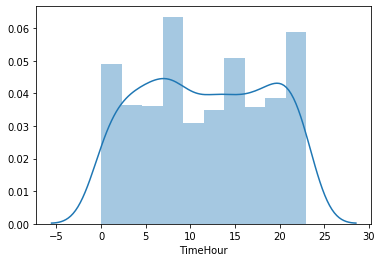

In [82]:
sns.distplot(ad_data['TimeHour'])

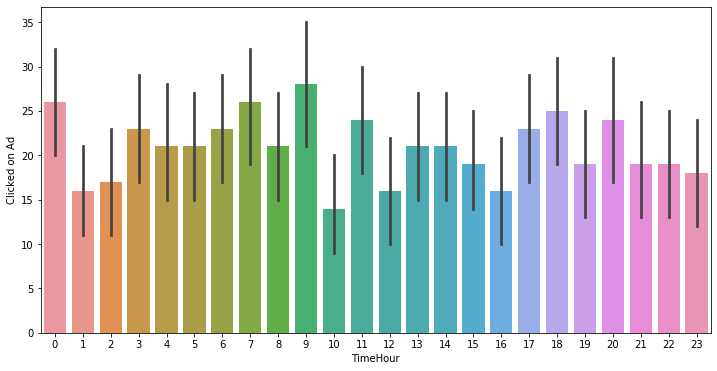

In [85]:
plt.figure(figsize=(12,6))
sns.barplot(x='TimeHour',y='Clicked on Ad',data=ad_data,estimator=np.sum)

In [87]:
def daydivide(x):
    if 6<=x<=12:
        return 'morning'
    elif 13<=x<=18:
        return 'noon'
    else:
        return 'night'

In [88]:
ad_data['TimeHour']=ad_data['TimeHour'].apply(lambda x: daydivide(x))

In [139]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,TimeHour,Timemonth,Timeday
0,68.95,35,61833.90,256.09,0,0,night,3,6
1,80.23,31,68441.85,193.77,1,0,night,4,0
2,69.47,26,59785.94,236.50,0,0,night,3,6
3,74.15,29,54806.18,245.89,1,0,night,1,6
4,68.37,35,73889.99,225.58,0,0,night,6,4


In [90]:
ad_data.groupby('TimeHour')['Clicked on Ad'].count()

TimeHour
morning    294
night      465
noon       241
Name: Clicked on Ad, dtype: int64

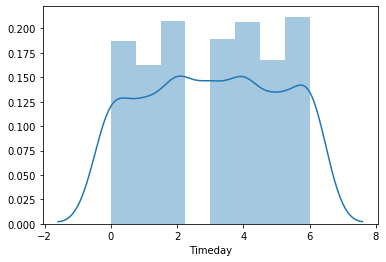

In [97]:
sns.distplot(ad_data['Timeday'])

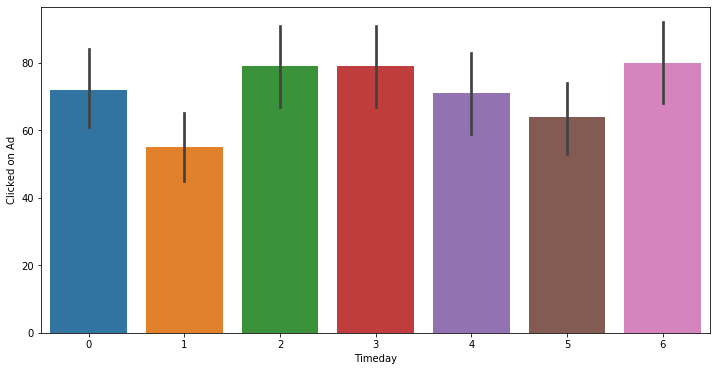

In [98]:
plt.figure(figsize=(12,6))
sns.barplot(x='Timeday',y='Clicked on Ad',data=ad_data,estimator=np.sum)

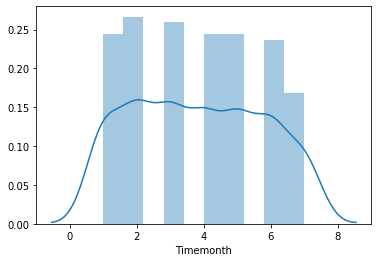

In [99]:
sns.distplot(ad_data['Timemonth'])

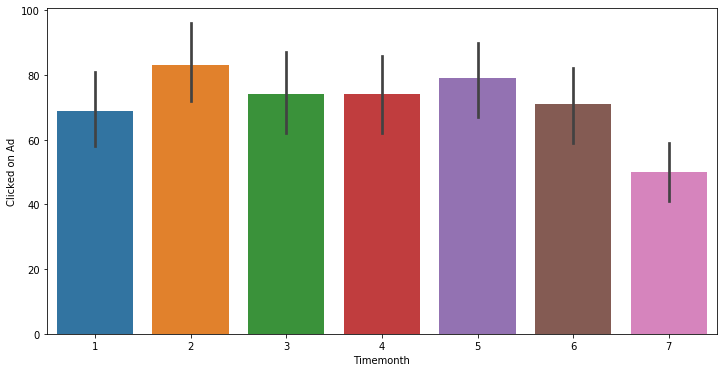

In [100]:
plt.figure(figsize=(12,6))
sns.barplot(x='Timemonth',y='Clicked on Ad',data=ad_data,estimator=np.sum)

In [138]:
ad_data.drop('Timestamp',axis=1,inplace=True)

In [140]:
final_data=pd.get_dummies(ad_data,columns=['TimeHour'],drop_first=True)

In [141]:
final_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Timemonth,Timeday,TimeHour_night,TimeHour_noon
0,68.95,35,61833.90,256.09,0,0,3,6,1,0
1,80.23,31,68441.85,193.77,1,0,4,0,1,0
2,69.47,26,59785.94,236.50,0,0,3,6,1,0
3,74.15,29,54806.18,245.89,1,0,1,6,1,0
4,68.37,35,73889.99,225.58,0,0,6,4,1,0


# check whether the missing value present in explanatory variables ?

In [43]:
for i in ad_data.columns:
    print(i,sum(ad_data[i].isna()))

Daily Time Spent on Site 0
Age 0
Area Income 0
Daily Internet Usage 0
Male 0
Clicked on Ad 0
TimeHour 0
Timeday 0


In [44]:
#our dataset has 0 missing value for every columns present.

# skewed classes?

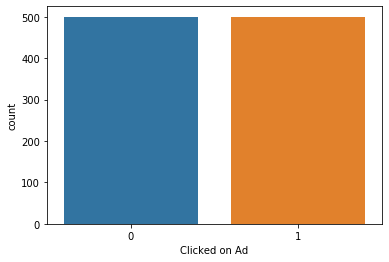

In [45]:
sns.countplot(ad_data['Clicked on Ad'])

In [46]:
# the count plot stats that the data is perfectly balanced.

In [47]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,TimeHour,Timeday
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,11.660000,15.484000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,6.960952,8.734073
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,0.000000,1.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,6.000000,8.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,12.000000,15.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,18.000000,23.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,23.000000,31.000000


# multicollinearity check?

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
def calculate_vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [147]:
x=ad_data.iloc[:,:-1]

In [148]:
calculate_vif(x)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Standardization vs Normalization?

In [142]:
# various features are having different scaling hence it is advisable to perfrom feature scaling.

from sklearn.model_selection import train_test_split
X=final_data.drop('Clicked on Ad',axis=1)
y=final_data['Clicked on Ad']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [143]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Timemonth                 1000 non-null   int64  
 7   Timeday                   1000 non-null   int64  
 8   TimeHour_night            1000 non-null   uint8  
 9   TimeHour_noon             1000 non-null   uint8  
dtypes: float64(3), int64(5), uint8(2)
memory usage: 64.6 KB


In [145]:
# we prefer to use standardization as logistic regression assumes the data to floows gussian distributions.
# but we will try both methods and compare the results 

from sklearn.preprocessing import MinMaxScaler,StandardScaler
#Normalization
norm=MinMaxScaler()
X_train_norm=norm.fit_transform(X_train)
X_test_norm=norm.transform(X_test)

#Standarization
stand=StandardScaler().fit(X_train)
X_train_stand=stand.transform(X_train)
X_test_stand=stand.transform(X_test)


# Step-2 feature Selection:

# method 1-Univariate Selection

In [155]:
from sklearn.feature_selection import SelectKBest,chi2

In [159]:
best_features=SelectKBest(score_func=chi2,k=6)
fit=best_features.fit(X_train,y_train)

In [160]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)

In [161]:
featurescores=pd.concat([dfcolumns,dfscores],axis=1)

In [162]:
featurescores.columns=['columns','scores']

In [163]:
featurescores

,columns,scores
0,Daily Time Spent on Site,1725.862565
1,Age,403.056577
2,Area Income,646026.830738
3,Daily Internet Usage,5575.060932
4,Male,0.801850
5,Timemonth,0.128980
6,Timeday,0.199903
7,TimeHour_night,1.110790
8,TimeHour_noon,0.359939


In [165]:
featurescores.nlargest(10,'scores')

,columns,scores
2,Area Income,646026.830738
3,Daily Internet Usage,5575.060932
0,Daily Time Spent on Site,1725.862565
1,Age,403.056577
7,TimeHour_night,1.110790
4,Male,0.801850
8,TimeHour_noon,0.359939
6,Timeday,0.199903
5,Timemonth,0.128980


# Method-2 Feature Importance

In [166]:
from sklearn.ensemble import ExtraTreesClassifier

In [167]:
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [168]:
model.feature_importances_

array([0.301045  , 0.0915671 , 0.11743035, 0.4265377 , 0.01028773,
       0.01732163, 0.02047699, 0.00825369, 0.00707982])

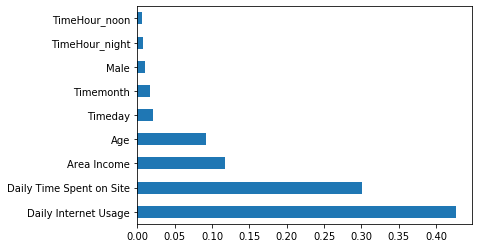

In [171]:
feat_importance=pd.Series(model.feature_importances_,index=X_train.columns)
feat_importance.nlargest(10).plot(kind='barh')

# Method-3 Heatmap

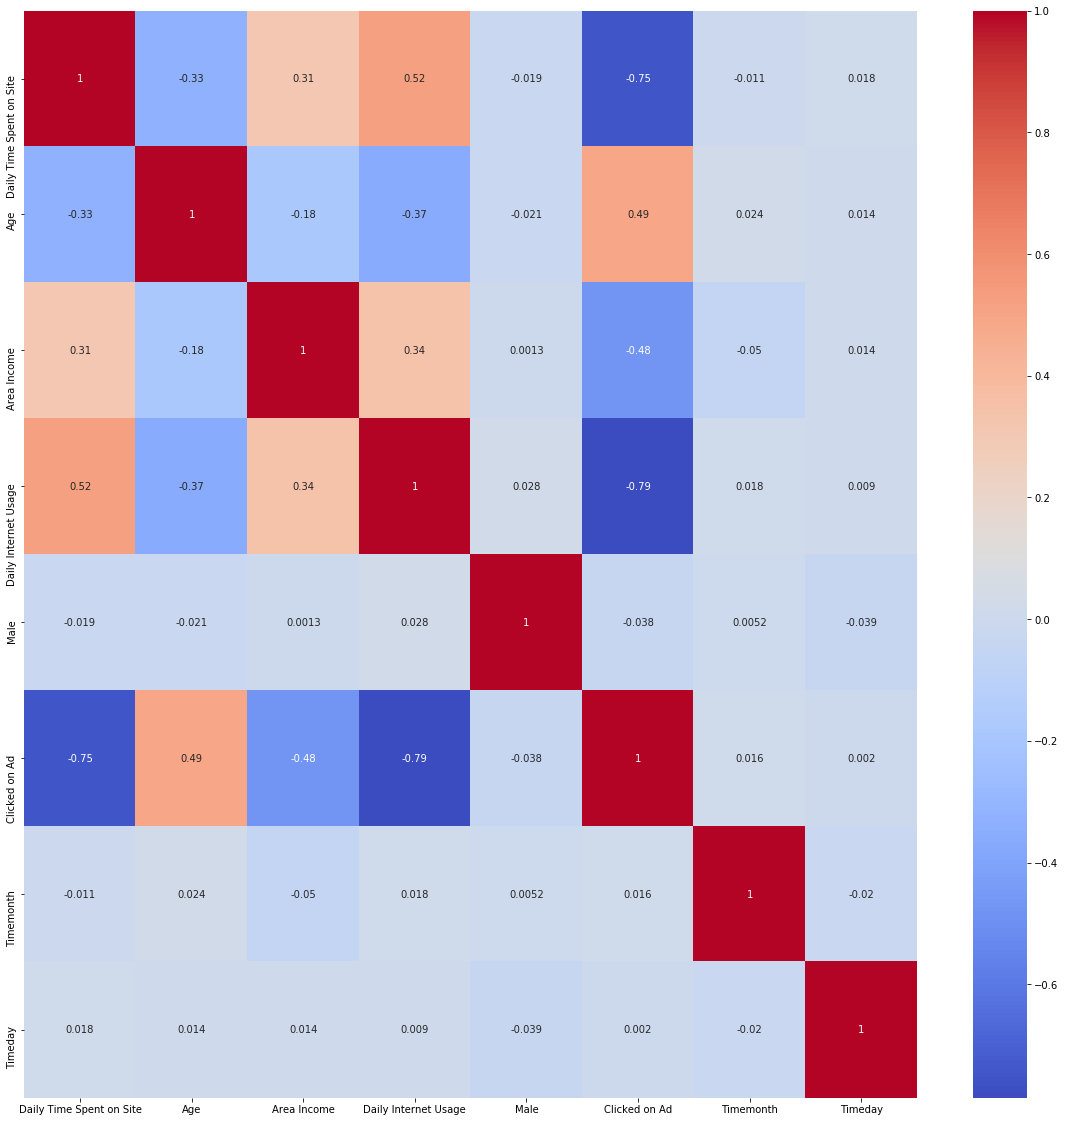

In [175]:
corrmat=ad_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(ad_data[top_corr_features].corr(),annot=True,cmap='coolwarm')

# Step-3 Model Creations

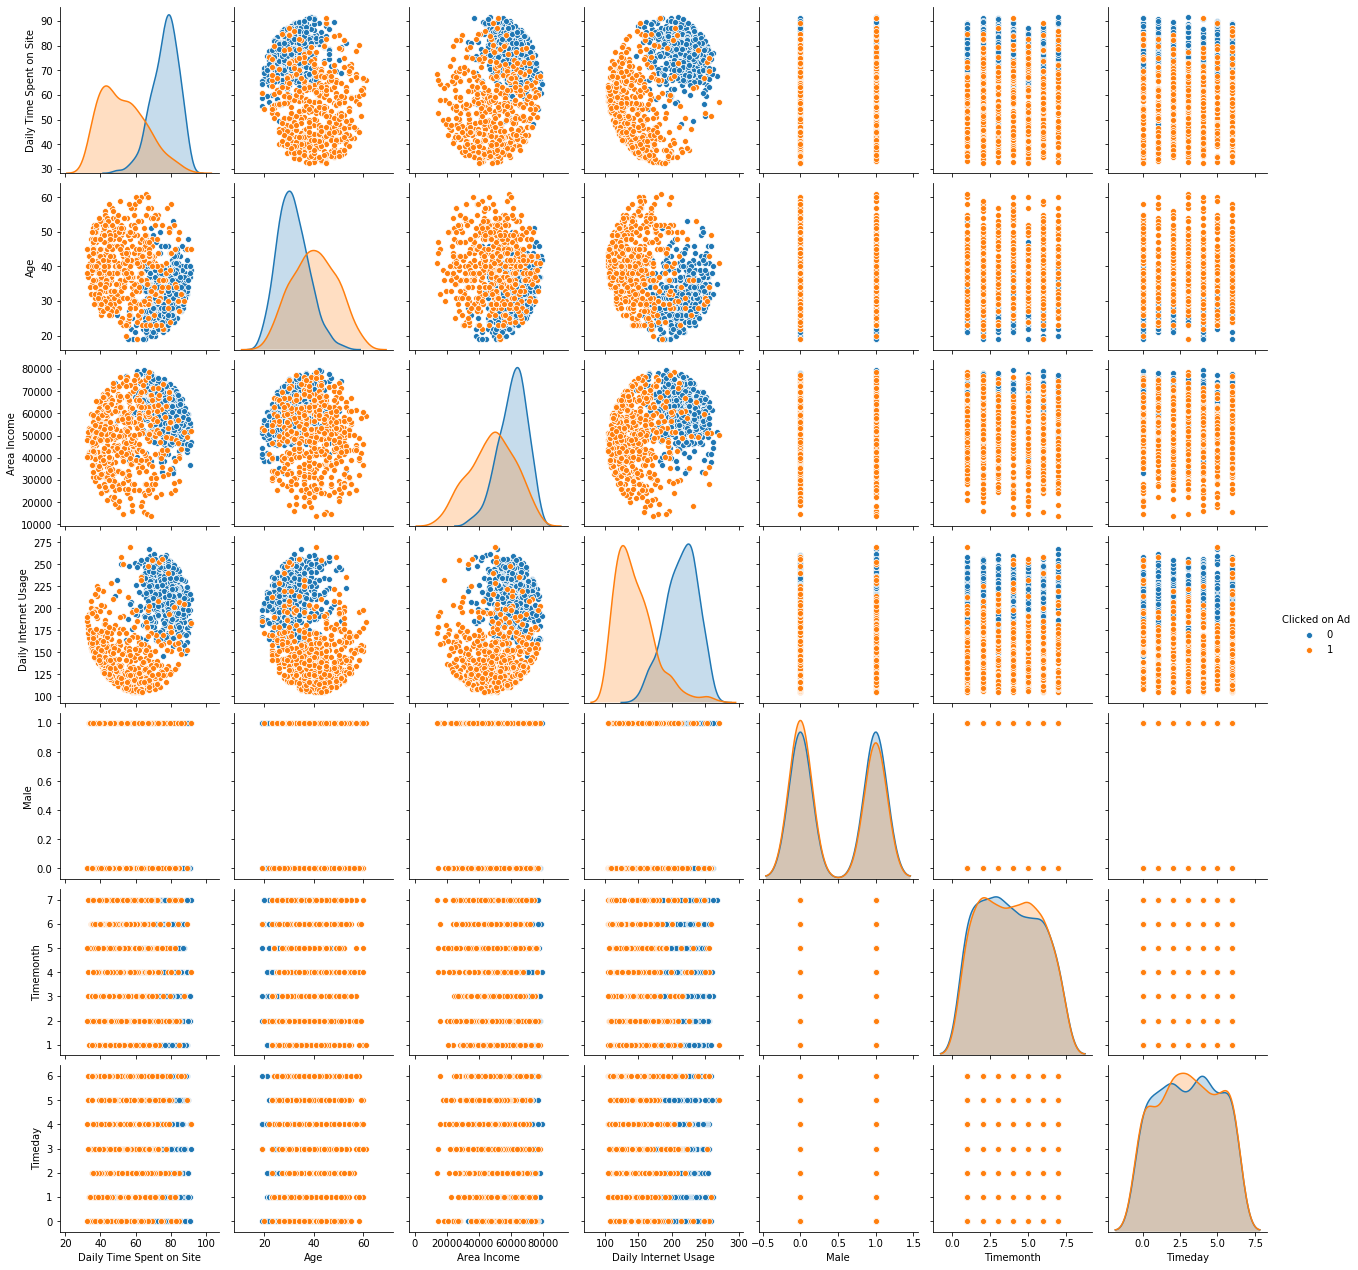

In [180]:

sns.pairplot(ad_data,hue='Clicked on Ad')

In [181]:
# As there is much overlap between the the two classes hence better option is to use KNN but we will try logistic regression then we
# will try with KNN.


In [182]:
from sklearn.linear_model import LogisticRegression

In [192]:
logmodel=LogisticRegression()
logmodel.fit(X_train_norm,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
predictions=logmodel.predict(X_test_norm)

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
knnmodel_stand=KNeighborsClassifier()
knnmodel.fit(X_train_stand,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [201]:
knnmodel_norm=KNeighborsClassifier()
knnmodel_norm.fit(X_train_norm,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Step-4 Performance Matrix

In [194]:
predictions=logmodel.predict(X_test_norm)

In [186]:
from sklearn.metrics import classification_report, confusion_matrix

In [195]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93        89
           1       0.97      0.92      0.94       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [200]:
knnpredictions_stand=knnmodel.predict(X_test_stand)

In [202]:
print(classification_report(y_test,knnpredictions_stand))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        89
           1       0.97      0.87      0.92       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200

